In [37]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#only projecting columns we need
proj_columns = ['Country', 'Ladder Score','Freedom', 'GDP', 'Life Expectancy', 'Generosity', 'Year']

#reading 2021 by itself because it has regional indictor which other csvs are muissing
df_2021 = pd.read_csv(f"Resources/years/2021.csv")[proj_columns + ['Regional indicator']]

happiness_combined_df = df_2021

#projecting only two columns 
country_df = df_2021[['Country', 'Regional indicator']]

#creating dictionary to  match regional indicators to countries
country_dict = country_df.set_index('Country').to_dict()['Regional indicator']

#looping through the years exct 2021 which we have already done and adding
#to a new combined dataframe 
for yr in range(2017, 2021):
    df_yr = pd.read_csv(f"Resources/years/{yr}.csv")[proj_columns]
    #adding regional indicator value to all years from country dict bove
    df_yr['Regional indicator'] = df_yr['Country'].apply(lambda x: country_dict.get(x, ''))
    #combining
    happiness_combined_df = pd.concat([happiness_combined_df,
        df_yr]) 

#happiness_combined_df.to_csv('Resources/combined_happiness.csv')
happiness_combined_df.head(5)

,Country,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Year,Regional indicator
0,Finland,7.842,0.949,10.775,72.0,-0.098,2021,Western Europe
1,Denmark,7.620,0.946,10.933,72.7,0.030,2021,Western Europe
2,Switzerland,7.571,0.919,11.117,74.4,0.025,2021,Western Europe
3,Iceland,7.554,0.955,10.878,73.0,0.160,2021,Western Europe
4,Netherlands,7.464,0.913,10.932,72.4,0.175,2021,Western Europe


In [2]:
# #DATA CLEANING
# #identify the columns with no regional indicator
# #happiness_combined_df['Regional indicator'] == ''][['Country','Year']]
# #pd.pivot_table(happiness_combined_df, values='Country', columns='Year', aggfunc='count')
# before_clean_df = happiness_combined_df
# before_clean_df.pivot(index='Country', columns='Year', values='Country').to_csv('Resources/pivoted-for-missing-val.csv')


In [38]:
#looking at the pivoted data set, it was revealed the countries were named diffrently in diffrent years,
#to solve that, these countries were renamed to one consistent value across years.
# ALso, some countries did not have any data for some years. For instance, Belize, Angola, Congo, Qatar are missing
#for most recent years. From our google research, It may be due to political situation and or high crime rate in Belize, 
#Angola and Congo and Central African Republic.
#Renaming the countries
rename_cntry_dict = {
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'North Macedonia': 'Macedonia',
    'Northern Cyprus': 'North Cyprus',
    'Taiwan Province of China': 'Taiwan',
}
rename_ri_dict = {
    'Hong Kong': 'East Asia',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Macedonia': 'Central and Eastern Europe',
    'North Cyprus': 'Western Europe',
    'Taiwan': 'East Asia',
    'Central African Republic': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa'
}

# in order to loop through data frame, call iterrows function
# which provides us an index of the row and all data in the row
for i, row in happiness_combined_df.iterrows():
    # grab either the rename value of the country, or if it is not
    # in the dictionary, just use the value already in the row as default
    #of the .get() function. We have to store this in a variable to use it 
    # for regional indicator below
    country = rename_cntry_dict.get(row['Country'], row['Country'])
    # using dataframe .at[], index from iterrows, and column name to set value
    happiness_combined_df.at[i, 'Country'] = country
    happiness_combined_df.at[i, 'Regional indicator'] = rename_ri_dict.get(country, row['Regional indicator'])

happiness_combined_df


,Country,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Year,Regional indicator
0,Finland,7.8420,0.949000,10.775000,72.000000,-0.098000,2021,Western Europe
1,Denmark,7.6200,0.946000,10.933000,72.700000,0.030000,2021,Western Europe
2,Switzerland,7.5710,0.919000,11.117000,74.400000,0.025000,2021,Western Europe
3,Iceland,7.5540,0.955000,10.878000,73.000000,0.160000,2021,Western Europe
4,Norway,7.4640,0.913000,10.932000,72.400000,0.175000,2021,Western Europe
...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.640881,6.625160,45.200001,0.082410,2020,Sub-Saharan Africa
149,Rwanda,3.3123,0.900589,7.600104,61.098846,0.055484,2020,Sub-Saharan Africa
150,Zimbabwe,3.2992,0.711458,7.865712,55.617260,-0.072064,2020,Sub-Saharan Africa
151,South Sudan,2.8166,0.451314,7.425360,51.000000,0.016519,2020,Sub-Saharan Africa


In [39]:
# save csv after cleaning
happiness_combined_df.to_csv('Resources/combined_happiness_after_clean.csv')


In [41]:
#Data_check: identify the columns with no regional indicator
happiness_combined_df[happiness_combined_df['Regional indicator'] == '']['Country'].unique()

array([], dtype=object)

In [6]:
#identify top 5 happy and bottom 5 countries by ladder score in each year.
happiness_combined_df['rank'] = happiness_combined_df.groupby(['Year'])['Ladder Score'].rank('max', ascending=False)#.sort_values(['Year', 'rank'])
happiness_combined_df = happiness_combined_df.set_index(['Year', 'rank']).sort_index()
happiness_combined_df.to_csv('Resources/combined_happiness_indexed.csv')
happiness_combined_df


Country  Ladder Score   Freedom       GDP  \
Year rank                                                                
2017 1.0                     Finland         7.537  0.635423  1.616463   
     2.0                     Denmark         7.522  0.626007  1.482383   
     3.0                 Switzerland         7.504  0.627163  1.480633   
     4.0                     Iceland         7.494  0.620071  1.564980   
     5.0                      Norway         7.469  0.617951  1.443572   
...                              ...           ...       ...       ...   
2021 145.0                    Malawi         3.512  0.715000  7.926000   
     146.0                     Yemen         3.467  0.824000  9.782000   
     147.0                  Botswana         3.415  0.897000  7.676000   
     148.0                  Tanzania         3.145  0.677000  7.943000   
     149.0  Central African Republic         2.523  0.382000  7.695000   

            Life Expectancy  Generosity            Regional indicator  
Year rank                                                              
2017 1.0           0.796667    0.362012                Western Europe  
     2.0           0.792566    0.355280                Western Europe  
     3.0           0.833552    0.475540                Western Europe  
     4.0           0.858131    0.290549                Western Europe  
     5.0           0.809158    0.245483                Western Europe  
...                     ...         ...                           ...  
2021 145.0        48.700000   -0.131000            Sub-Saharan Africa  
     146.0        59.269000   -0.246000  Middle East and North Africa  
     147.0        61.400000    0.061000            Sub-Saharan Africa  
     148.0        56.201000   -0.047000            Sub-Saharan Africa  
     149.0        52.493000   -0.102000            Sub-Saharan Africa  

[769 rows x 7 columns]

In [7]:
# found the average life expecatancy of world happiness to show how it improved every year.

average_life_expect= happiness_combined_df.groupby('Year')['Life Expectancy'].mean()
average_life_expect

Year
2017     0.551341
2018     0.597346
2019     0.725244
2020    64.445529
2021    64.992799
Name: Life Expectancy, dtype: float64

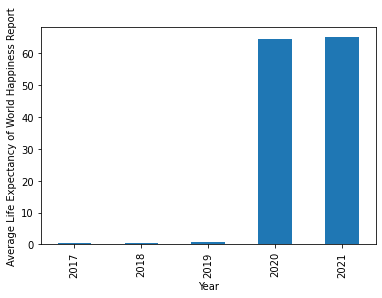

In [8]:
#Bar graph for avg life expecatancy of world happiness

average_life_expect.plot(kind="bar")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Average Life Expectancy of World Happiness Report")
plt.show()

In [19]:
multi_group = happiness_combined_df.groupby(['Year','Regional indicator','Country'])[['Life Expectancy']].mean()
multi_group
#clean_group_df = multi_group.dropna(how='all', axis=1)

#clean_multigrp= multi_group.dropna(axis=0, subset=['Country'])


Life Expectancy
Year Regional indicator         Country                                
2017 Central and Eastern Europe Albania                            0.71
                                Bosnia and Herzegovina             0.64
                                Bulgaria                           0.53
                                Croatia                            0.74
                                Czech Republic                     0.81
...                                                                 ...
2021 Western Europe             Portugal                          67.30
                                Spain                             73.80
                                Sweden                            72.70
                                Switzerland                       74.40
                                United Kingdom                    72.50

[761 rows x 1 columns]

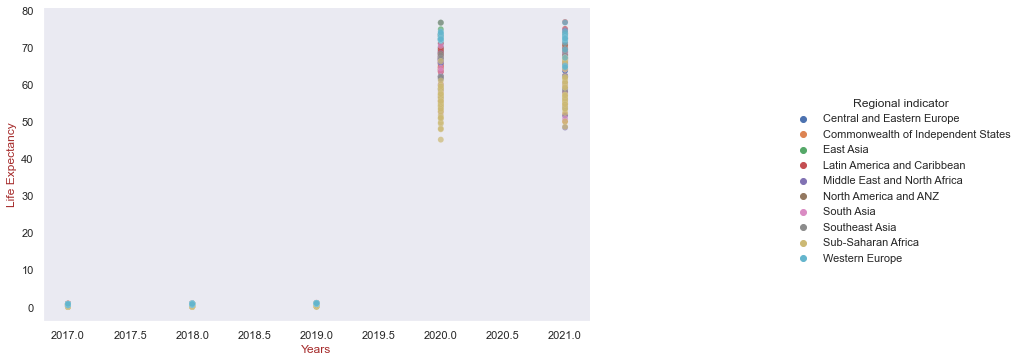

In [20]:
sns.set_style('dark')
plot = sns.relplot(data=multi_group, x='Year', y='Life Expectancy',hue='Regional indicator', alpha=0.7, edgecolors="orange", linewidth=0.1).set(xscale="linear")
#plot = sns.relplot(x= 'Score', y ='Total Amount Deposited', data =multi_group, hue = 'Predicted Category',alpha=0.7, edgecolors="orange", linewidth=0.1)
plot.set_axis_labels("Years", "Life Expectancy",color = "brown")
plot.fig.set_size_inches(15,5)


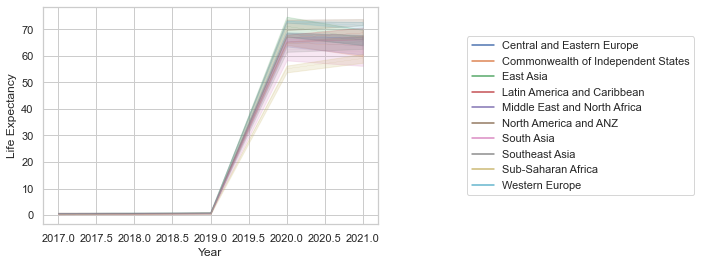

In [21]:
sns.set(style = 'whitegrid')
#fmri = sns.load_dataset("fmri")
  
g = sns.lineplot(x ="Year",
             y ="Life Expectancy",
             hue ="Regional indicator",
             data = multi_group,
             alpha=0.9, 
             linewidth=0.1)
g.legend(loc='center left', bbox_to_anchor=(1.25,0.5), ncol=1)

In [22]:
happiness_combined_df.groupby(['Year','Country'])['Life Expectancy']
happiness_combined_df

Country  Ladder Score   Freedom        GDP  \
Year rank                                                                 
2021 32.0                     Brazil        6.3770  0.927000  11.488000   
     77.0                     Greece        5.4770  0.717000  11.000000   
2020 31.0                  Singapore        6.3771  0.926645  11.395521   
     78.0                  Hong Kong        5.5104  0.779834  10.934671   
2021 56.0                   Honduras        5.9400  0.796000  10.611000   
...                              ...           ...       ...        ...   
2017 106.0                  Cambodia        4.7090  0.318698   0.368421   
2018 155.0  Central African Republic        3.0830  0.305000   0.024000   
2019 135.0                      Togo        4.2120  0.313000   0.811000   
2017 139.0              Sierra Leone        3.8080  0.390661   0.521021   
2018 113.0                    Gambia        4.5710  0.355000   0.256000   

            Life Expectancy  Generosity           Regional indicator  
Year rank                                                             
2021 32.0             76.95   -0.018000  Latin America and Caribbean  
     77.0             76.82    0.067000               Western Europe  
2020 31.0             76.80    0.029879               Southeast Asia  
     78.0             76.77    0.134980                    East Asia  
2021 56.0             75.10   -0.258000  Latin America and Caribbean  
...                     ...         ...                          ...  
2017 106.0             0.01    0.293041               Southeast Asia  
2018 155.0             0.01    0.218000           Sub-Saharan Africa  
2019 135.0             0.00    0.074000           Sub-Saharan Africa  
2017 139.0             0.00    0.157497           Sub-Saharan Africa  
2018 113.0             0.00    0.238000           Sub-Saharan Africa  

[769 rows x 7 columns]

In [23]:
happiness_combined_df['Life Expectancy'] = happiness_combined_df['Life Expectancy'].round(2)
happiness_combined_df=happiness_combined_df.sort_values(by = ["Life Expectancy"],ascending=[False])
happiness_combined_df.head(5)
                           
                          
#average_life_exp= happiness_combined_df.groupby['Country']['Life Expectancy']
#average_life_exp.head(10)
#happiness_combined_df.sort_values(by = ["Life Expectancy"],ascending=[False])


Country  Ladder Score   Freedom        GDP  Life Expectancy  \
Year rank                                                                  
2021 32.0     Brazil        6.3770  0.927000  11.488000            76.95   
     77.0     Greece        5.4770  0.717000  11.000000            76.82   
2020 31.0  Singapore        6.3771  0.926645  11.395521            76.80   
     78.0  Hong Kong        5.5104  0.779834  10.934671            76.77   
2021 56.0   Honduras        5.9400  0.796000  10.611000            75.10   

           Generosity           Regional indicator  
Year rank                                           
2021 32.0   -0.018000  Latin America and Caribbean  
     77.0    0.067000               Western Europe  
2020 31.0    0.029879               Southeast Asia  
     78.0    0.134980                    East Asia  
2021 56.0   -0.258000  Latin America and Caribbean

<AxesSubplot:>

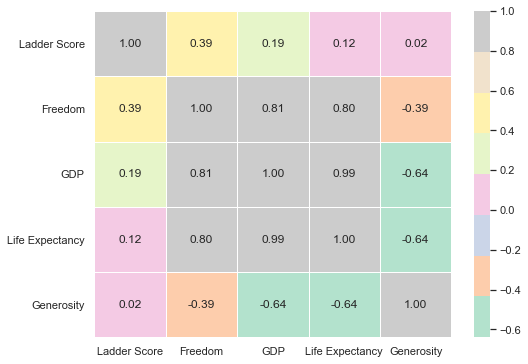

In [24]:
##Correlation values between the data

f,ax =plt.subplots(figsize=(8,6))
sns.heatmap(happiness_combined_df.corr(),annot=True,linewidth =.5,cmap = 'Pastel2',fmt ='.2f',ax=ax)

In [25]:
happiness_top5_df = happiness_combined_df.head(5)
happiness_top5_df

Country  Ladder Score   Freedom        GDP  Life Expectancy  \
Year rank                                                                  
2021 32.0     Brazil        6.3770  0.927000  11.488000            76.95   
     77.0     Greece        5.4770  0.717000  11.000000            76.82   
2020 31.0  Singapore        6.3771  0.926645  11.395521            76.80   
     78.0  Hong Kong        5.5104  0.779834  10.934671            76.77   
2021 56.0   Honduras        5.9400  0.796000  10.611000            75.10   

           Generosity           Regional indicator  
Year rank                                           
2021 32.0   -0.018000  Latin America and Caribbean  
     77.0    0.067000               Western Europe  
2020 31.0    0.029879               Southeast Asia  
     78.0    0.134980                    East Asia  
2021 56.0   -0.258000  Latin America and Caribbean

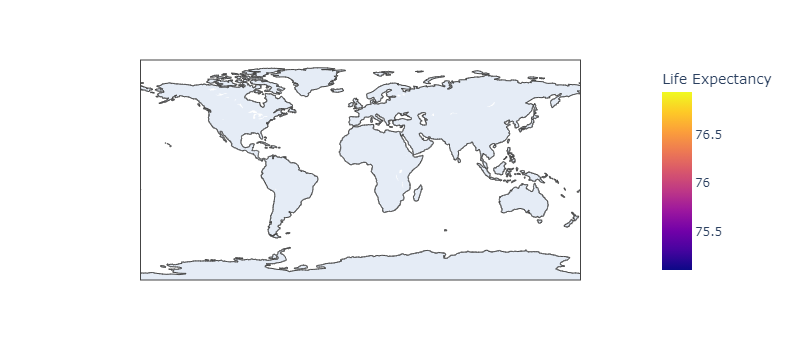

In [26]:
import plotly.express as px

df = px.data.gapminder().query("year==2021")
fig = px.choropleth(happiness_top5_df, locations='Regional indicator',
                    color="Life Expectancy", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

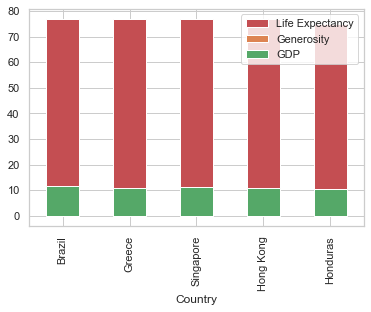

In [34]:
##Freedom to make life choices vs Generosity vs Corruption
ax = happiness_top5_df.plot(y="Life Expectancy", x="Regional indicator", kind="bar", color='C3')
happiness_top5_df.plot(y="Generosity", x="Country", kind="bar", ax=ax, color="C1",)
happiness_top5_df.plot(y="GDP", x="Country", kind="bar", ax=ax, color="C2",)

plt.show()

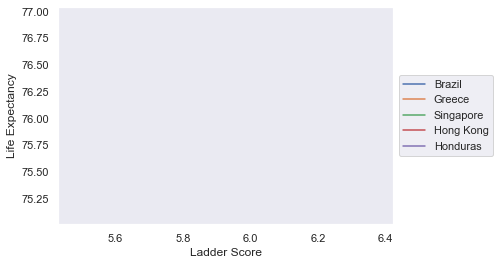

In [35]:

sns.set(style = 'dark')
#fmri = sns.load_dataset("fmri")
g = sns.lineplot(x ="Ladder Score",
             y ="Life Expectancy",
             hue ="Country",
             data = happiness_top5_df,
             alpha=0.9, 
             linewidth=0.1)
g.legend(loc='center left', bbox_to_anchor=(1.0,0.5), ncol=1)
